# Análise da Pesquisa sobre Falhas na Entrega de Rações

In [1]:
!pip install -r ../requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached gensim-4.3.3.tar.gz (23.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached transformers-4.57.1-py3-none-any.whl.metadata (43 kB)
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [23 lines of output]
      + /usr/bin/python3 /tmp/pip-install-1a1yulff/numpy_8c514416a42c400d966ad85bbd84c1b0/vendored-meson/meson/meson.py setup /tmp/pip-install-1a1yulff/numpy_8c514416a42c400d966ad85bbd84c1b0 /tmp/pip-install-1a1yulff/numpy_8c514416a42c400d966ad85bbd84c1b0/.mesonpy-dtcw8f33 -Dbuildtype=release -Db_

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from IPython.display import display, Markdown, Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/brunoconter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Run the main script to process data and generate charts
!python ../main.py

No .xlsx file found in the assets directory.


## Introdução

Este relatório apresenta uma análise aprofundada das respostas coletadas através do formulário sobre falhas na entrega de rações. O objetivo é compreender os principais problemas enfrentados pelos diferentes atores da cadeia produtiva, identificar os sentimentos predominantes e propor ações de melhoria para otimizar o processo logístico.

## Metodologia

A análise foi realizada em três etapas principais:

1.  **Segmentação por Perfil:** As respostas foram agrupadas de acordo com o perfil do respondente (Produtor, Veterinário/Extensionista, Motorista, Gestão, etc.).
2.  **Análise de Sentimento e Padrões:** As respostas de cada grupo foram examinadas para identificar os principais problemas, a frequência com que ocorrem e o sentimento geral (negativo, neutro, positivo).
3.  **Elaboração do Diagnóstico e Recomendações:** Com base nos padrões identificados, foi elaborado um diagnóstico consolidado e um conjunto de ações de melhoria.

## Visualização dos Dados

### Frequência de Problemas por Perfil de Ator

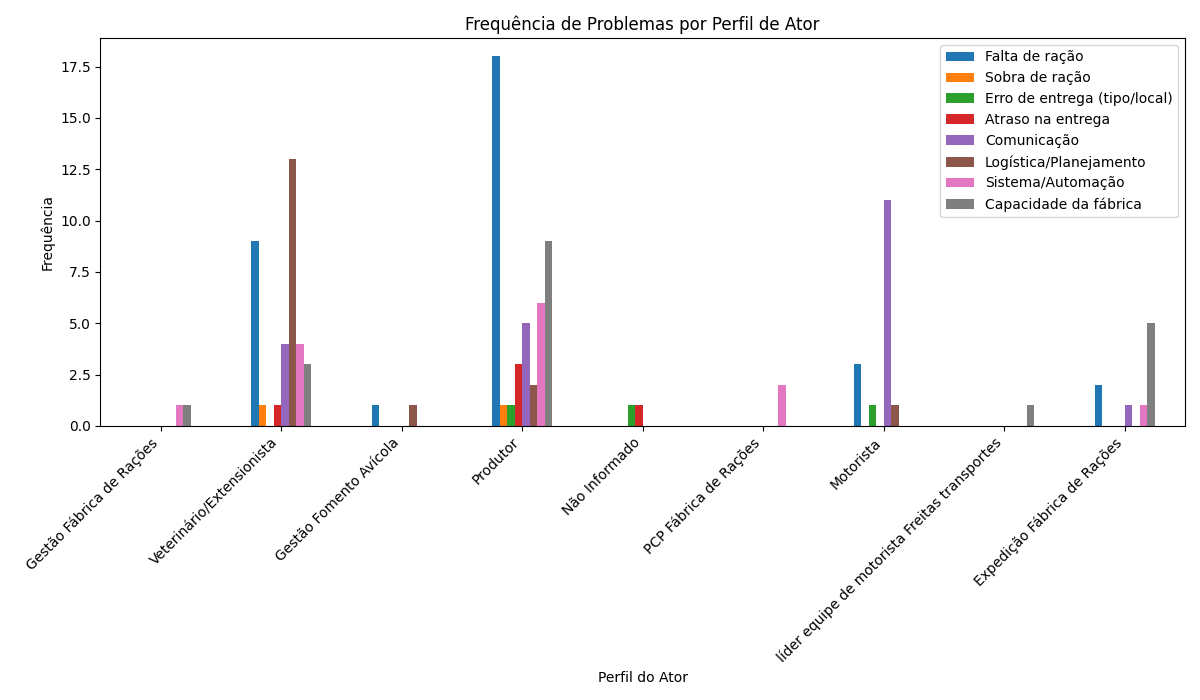

### Frequência de Sugestões de Melhoria por Perfil de Ator

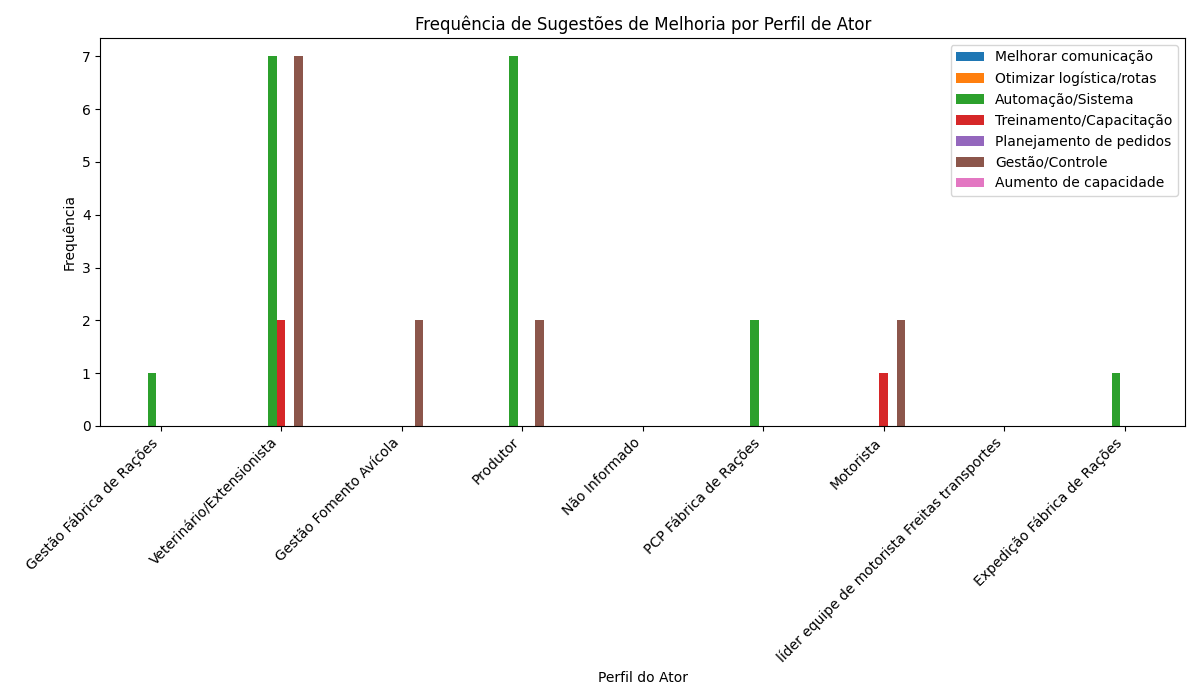

### Análise de Pareto dos Problemas (Agregado)

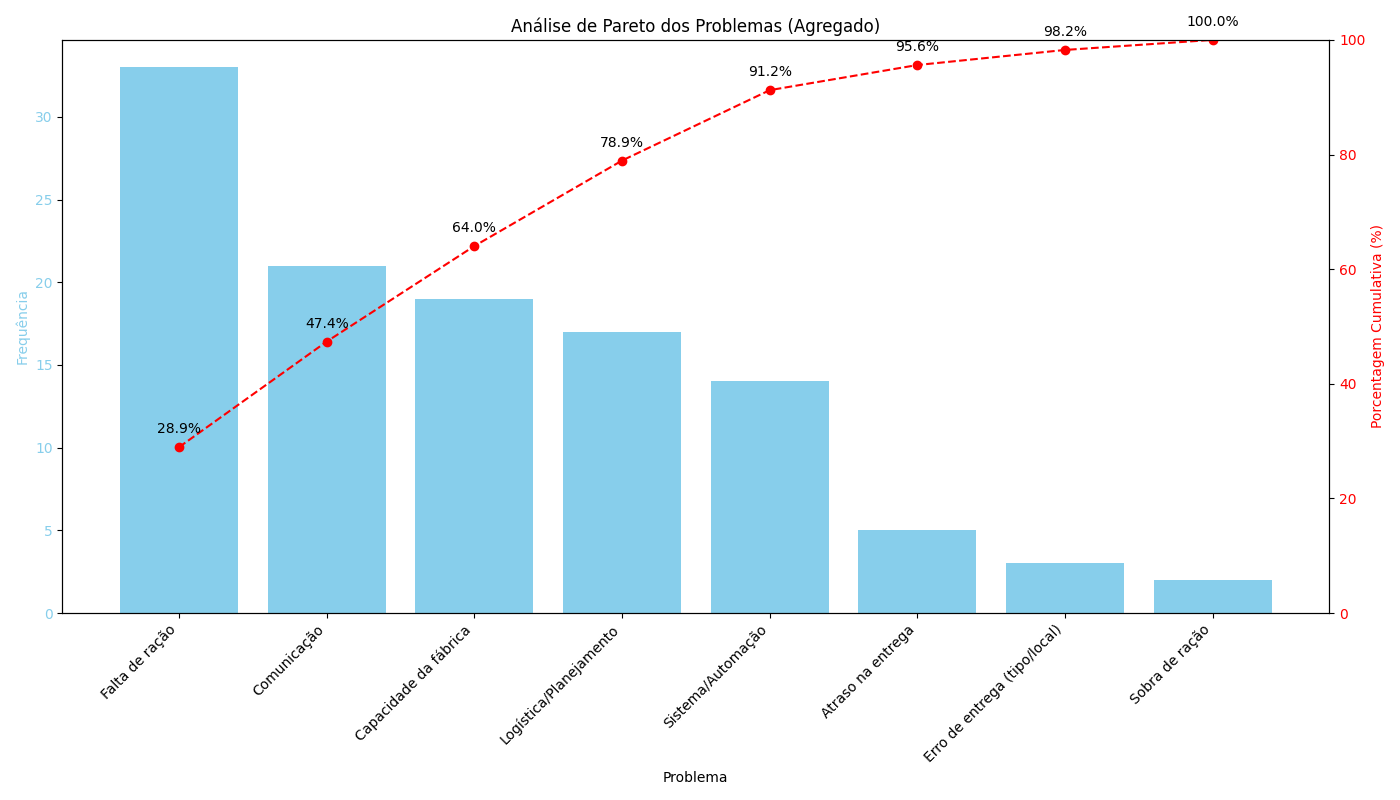

In [4]:
display(Markdown('### Frequência de Problemas por Perfil de Ator'))
display(Image(filename='../plots/problemas_por_perfil.png'))
display(Markdown('### Frequência de Sugestões de Melhoria por Perfil de Ator'))
display(Image(filename='../plots/sugestoes_por_perfil.png'))
display(Markdown('### Análise de Pareto dos Problemas (Agregado)'))
display(Image(filename='../plots/pareto_problemas_agregado.png'))

## Análise Estratégica

In [5]:
with open('../docs/strategic_analysis_output.txt', 'r', encoding='utf-8') as f:
    strategic_analysis = f.read()
display(Markdown(strategic_analysis))

## Análise Estratégica das Categorias de Problemas

### Distribuição de Frequência por Categoria
| Categoria                   |   Frequência |   Frequência Cumulativa |   Porcentagem Cumulativa |
|:----------------------------|-------------:|------------------------:|-------------------------:|
| Gestão de Insumos e Estoque |           54 |                      54 |                  47.3684 |
| Processos e Informação      |           35 |                      89 |                  78.0702 |
| Logística e Distribuição    |           25 |                     114 |                 100      |

### Priorização por Impacto (Regra 80/20)
A categoria de maior impacto, concentrando a maior frequência de problemas, é: **Gestão de Insumos e Estoque** com 54 ocorrências, representando 47.37% do total acumulado.

### Hipótese de Causa Raiz para a Categoria de Maior Impacto
**Causa Raiz Sugerida:** Falta de visibilidade e controle sobre o estoque em tempo real e falhas no planejamento da demanda. A ausência de um sistema integrado que monitore o consumo e o estoque nas granjas leva a decisões reativas e imprecisas, resultando em falta ou sobra de ração.

### Ação Estratégica Sugerida
**Iniciativa Prioritária:** Implementação de um sistema de gestão de estoque em tempo real e otimização do planejamento de demanda. Isso incluiria a instalação de sensores de nível nos silos das granjas e a integração com um software que permita prever o consumo e gerenciar os pedidos de forma proativa.



## Análise de Tópicos com NLP

In [9]:
def get_topics(data, n_topics=5, n_top_words=5):
    stop_words = stopwords.words('portuguese')
    vectorizer = CountVectorizer(stop_words=stop_words)
    X = vectorizer.fit_transform(data)
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)
    feature_names = vectorizer.get_feature_names_out()
    topics = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(f'Tópico {topic_idx + 1}: {", ".join(top_words)}')
    return topics

with open('../docs/analysis_by_profile.txt', 'r', encoding='utf-8') as f:
    content = f.read()

responses = re.findall(r'- Resposta \d+: (.*)', content)

topics = get_topics(responses)
display(Markdown('### Principais Tópicos Mencionados nas Respostas'))
for topic in topics:
    display(Markdown(f'- {topic}'))

### Principais Tópicos Mencionados nas Respostas

- Tópico 1: ração, fábrica, produtor, ter, qualidade

- Tópico 2: ração, comunicação, peso, desempenho, melhorar

- Tópico 3: ração, produtor, motorista, fábrica, abate

- Tópico 4: ração, falta, produção, aves, pra

- Tópico 5: ração, pedido, fábrica, produtor, ter

In [18]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# É necessário ter o NLTK instalado e as stopwords baixadas para rodar localmente.
# Se estiver em um ambiente que não permite download de nltk, você deve fornecer as stopwords diretamente.
try:
    from nltk.corpus import stopwords
except ImportError:
    # Fallback list if NLTK is not available
    print("NLTK não encontrado. Usando lista de stopwords estática.")
    class DummyStopwords:
        def words(self, lang):
            return ['a', 'o', 'e', 'é', 'de', 'do', 'da', 'em', 'um', 'uma', 'para', 'com', 'por', 'mais', 'como', 'ao', 'as', 'dos', 'nas', 'os', 'no', 'na', 'porém', 'seja', 'ser', 'ele', 'ela', 'eles', 'elas', 'que', 'isso']
    stopwords = DummyStopwords()

from IPython.display import Markdown, display
import os

# Função de extração de tópicos melhorada
def get_topics(data, n_topics=5, n_top_words=5):
    # 1. Carregar stopwords em português
    # Converte para set para operações de busca e adição mais rápidas
    stop_words = set(stopwords.words('portuguese'))
    
    # 2. ADICIONAR TERMOS CHAVE ESPECÍFICOS E PALAVRAS GENÉRICAS
    # 'ração' é a palavra dominante a ser removida para tópicos mais específicos.
    # 'fabrica', 'produtor', 'ter', 'pra' etc. são comuns nas respostas e devem ser consideradas.
    custom_stopwords = ['ração', 'fabrica', 'fábrica', 'produtor', 'ter', 'pra', 'fazer', 'poder', 'deve', 'ser', 'algo', 'não', 'motorista', 'aviário', 'aviários', 'galpão', 'galpões', 'empresa', 'empresas', 'trabalho', 'trabalhar', 'tempo', 'bom', 'boa', 'coisa', 'coisas', 'muito', 'mais', 'outro', 'outros', 'mesmo', 'mesma', 'tudo', 'todas', 'todos'] 
    stop_words.update(custom_stopwords)
    
    # Inicializar o vetorizador com as stopwords aprimoradas
    # min_df=2 garante que palavras que aparecem apenas uma vez são ignoradas, 
    # o que geralmente melhora a qualidade dos tópicos no LDA.
    vectorizer = CountVectorizer(stop_words=list(stop_words), min_df=2)
    
    X = vectorizer.fit_transform(data)
    
    # Ajustar 'max_iter' e 'learning_decay' para melhor convergência
    lda = LatentDirichletAllocation(
        n_components=n_topics, 
        random_state=42,
        max_iter=10,             
        learning_decay=0.7       
    )
    
    lda.fit(X)
    
    feature_names = vectorizer.get_feature_names_out()
    topics = []
    
    for topic_idx, topic in enumerate(lda.components_):
        # Seleciona as N palavras com maior peso
        top_words_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_indices]
        topics.append(f'Tópico {topic_idx + 1}: {", ".join(top_words)}')
        
    return topics

# --- Lógica de Carregamento e Processamento Aprimorada ---

# Caminho dinâmico para o arquivo no repositório
file_path = '../docs/analysis_by_profile.txt'
content = ""

try:
    # Abertura e leitura do arquivo com o caminho relativo corrigido
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()
except FileNotFoundError:
    display(Markdown(f'**ERRO:** Arquivo não encontrado no caminho: `{os.path.abspath(file_path)}`. O código não pode ser executado sem o arquivo.'))
    # Retorna o código para o usuário se o arquivo não for encontrado
    exit()

# Extrai o texto de todas as respostas (padrão 'Resposta N: ...')
responses = re.findall(r'- Resposta \d+: (.*)', content)

# Processa os dados
if responses:
    topics = get_topics(responses)
    
    # Display do resultado
    display(Markdown('### Principais Tópicos Mencionados nas Respostas (Melhorado e Filtrado)'))
    for topic in topics:
        display(Markdown(f'- {topic}'))
else:
    display(Markdown('**ATENÇÃO:** Não foram encontradas respostas no formato `- Resposta N: (texto)` no arquivo para processamento.'))

### Principais Tópicos Mencionados nas Respostas (Melhorado e Filtrado)

- Tópico 1: entrega, produtores, falta, pedido, expedição

- Tópico 2: entrega, falta, qualidade, pois, peso

- Tópico 3: pedido, mandar, melhorar, programação, entrega

- Tópico 4: aves, desempenho, falta, peso, perda

- Tópico 5: comunicação, abate, carga, melhor, vezes